In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objects as go

In [2]:
url = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/video_games_sales.csv'

data = pd.read_csv(url)
data = data.dropna()

data.shape                   

(6825, 16)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


We see that some of the numerical features are loaded as object type. We will explicitly convert those columns into float and int.

In [4]:
data["Year_of_Release"] = data["Year_of_Release"].astype("int64")
data["Critic_Count"] = data["Critic_Count"].astype("int64")
data["User_Score"] = data["User_Score"].astype("float64")
data["User_Count"] = data["User_Count"].astype("int64")

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   int64  
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   int64  
 12  User_Score       6825 non-null   float64
 13  User_Count       6825 non-null   int64  
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(7), int64(3), object(6)
memory usage: 906.4+ KB


**Plot sales as a function of Year_of_Release**

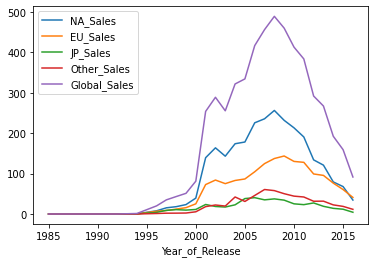

In [5]:
sales = []
for feature in data.columns:
    if ("Sales" in feature):
        sales.append(feature)
data.groupby("Year_of_Release")[sales].agg("sum").plot()

**Create a box plot for top 5 bigges gaming platforms**

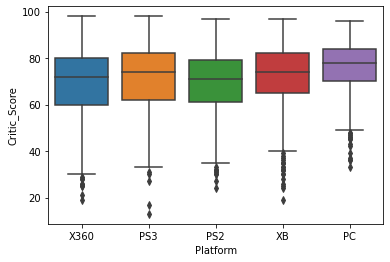

In [6]:
topPlatform = data["Platform"].value_counts().sort_values(ascending = False).\
              head(5).index.values              

filtered_data = data[data["Platform"].isin(topPlatform)]

sns.boxplot(x = "Platform", y = "Critic_Score", data = filtered_data)

**Visualize Global Sales by Genre and Platform**

In [7]:
# default function for pivot_table is mean
sales = data.pivot_table(index = "Platform", columns = "Genre", 
                         values = "Global_Sales", aggfunc = "sum")
sales

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
3DS,30.81,2.00,2.63,4.48,27.61,2.63,13.89,18.94,1.02,16.08,2.20,0.94
DC,NaN,1.33,0.56,NaN,0.12,NaN,0.20,0.68,0.05,0.52,1.09,NaN
DS,42.43,8.83,3.37,68.82,55.02,50.50,29.93,60.31,6.40,42.71,6.01,8.00
GBA,23.21,4.54,3.28,8.59,40.36,5.47,12.60,21.00,1.40,2.03,5.93,3.34
GC,29.99,4.56,15.81,12.72,24.67,3.31,11.09,12.48,13.04,8.39,19.91,3.45
PC,25.45,1.42,0.13,3.02,0.46,0.19,3.18,44.68,36.34,40.34,6.54,25.37
PS,54.93,1.10,18.91,5.66,18.92,0.26,34.17,44.07,5.86,1.67,20.75,0.25
PS2,238.73,10.74,64.72,38.70,52.34,3.97,127.17,77.30,98.20,34.01,191.88,8.21
PS3,262.38,16.18,47.83,26.59,20.91,0.40,62.17,64.00,174.54,7.91,98.20,3.19


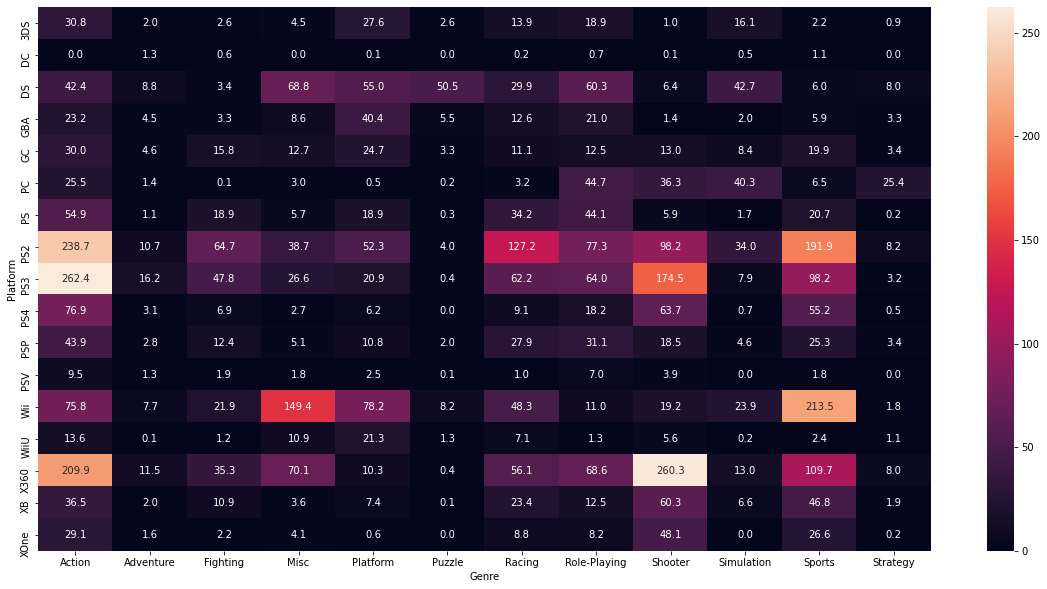

In [9]:
# Replace NaN with 0.0
sales = sales.fillna(0.0)

plt.figure(figsize=(20,10))
sns.heatmap(sales, annot = True, fmt = "0.1f")

## Use Plotly
**Build a line plot showing the number of games releases and their sales**

In [13]:
yearly_sales = data.groupby("Year_of_Release")["Global_Sales"].sum()
               
yearly_release = data.groupby("Year_of_Release")["Name"].count()

yearly_data = pd.DataFrame(yearly_sales).join(yearly_release).\
              rename(columns={"Name": "Number_of_Release"})
yearly_data

,Global_Sales,Number_of_Release
Year_of_Release,,
1985,0.03,1
1988,0.03,1
1992,0.03,1
1994,1.27,1
1996,20.10,7
1997,35.01,13
1998,43.18,25
1999,51.17,30
2000,81.24,102


In [14]:
trace_sale = go.Scatter(x = yearly_data.index, 
                        y = yearly_data["Global_Sales"],
                        name = "Global Sales")

trace_release = go.Scatter(x = yearly_data.index, 
                           y = yearly_data["Number_of_Release"],
                           name = "Number of Releases")

lines = [trace_sale, trace_release]

layout = {"title" : "Yearly Game Release and Sales"}
fig = go.Figure(data = lines, layout = layout)
iplot(fig)

**Build a bar chart to compare the market share of different gaming platforms broken down by the number of new releases and by total revenue.**

In [15]:
plat_release = data.groupby("Platform")["Name"].count()

plat_sale = data.groupby("Platform")["Global_Sales"].sum()

plat_data = pd.DataFrame(plat_release).join(plat_sale).\
            rename(columns = {"Name" : "Number_of_Release"})
plat_data

,Number_of_Release,Global_Sales
Platform,,
3DS,155,123.23
DC,14,4.55
DS,464,382.33
GBA,237,131.75
GC,348,159.42
PC,651,187.12
PS,150,206.55
PS2,1140,945.97
PS3,769,784.30


In [16]:
trace_plat_sale = go.Bar(x = plat_data.index, 
                         y = plat_data["Global_Sales"],
                         name = "Global Sales")

trace_plat_release = go.Bar(x = plat_data.index, 
                            y = plat_data["Number_of_Release"], 
                            name = "Number of Releases")

bars = [trace_plat_sale, trace_plat_release]
layout2 = {"title" : "New Game Release and Global Sales of Gaming Platforms"}
fig2 = go.Figure(data = bars, layout = layout2)
iplot(fig2)

**Build a box plot to show the distribution of critic's ratings by genre**

In [17]:
critic_score = []

for genre in data.Genre.unique():
    critic_score.append(go.Box(y = data[data.Genre == genre].Critic_Score, name = genre))
    
layout3 = {"title" : "Critic Score Distribution by Genre"}
fig3 = go.Figure(data = critic_score, layout = layout3)
iplot(fig3)